In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import akshare as ak
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn; seaborn.set()
import datetime

In [3]:
# obtain the exchage rate data from AKShare, which is an elegant and simple financial data interface library for Python
# using the API below, to access history trading data from the following website
# http://biz.finance.sina.com.cn/forex/forex.php?startdate=2012-01-01&enddate=2021-06-14&money_code=EUR&type=0
exchange_rate_orign_df = ak.currency_boc_sina(symbol="加拿大元", start_date="20190101", end_date="20231115")

In [4]:
# Select data which I interested in and rename the columns of dataframe
exchange_rates = exchange_rate_orign_df[['日期','中行钞卖价/汇卖价', '中行汇买价']].rename(
        columns={
            "日期": "date", # type: datetime.dat
            "中行钞卖价/汇卖价": "bank_selling_exchange_rate", # The amount of Chinese currency that Bank of China willing to sell 100 CAD$ to you
            '中行汇买价':"bank_buying_exchange_rate" # The amount of Chinese currency that Bank of China is willing to buy 100 CAD$ from you
            }
        )

In [5]:
exchange_rates.set_index(exchange_rates['date'], inplace=True)
exchange_rates

,date,bank_selling_exchange_rate,bank_buying_exchange_rate
date,,,
2019-01-01,2019-01-01,505.91,502.21
2019-01-02,2019-01-02,505.35,501.65
2019-01-03,2019-01-03,510.20,506.46
2019-01-04,2019-01-04,511.09,507.35
2019-01-07,2019-01-07,515.00,511.23
...,...,...,...
2023-11-09,2023-11-09,531.69,528.15
2023-11-10,2023-11-10,528.62,525.10
2023-11-13,2023-11-13,530.17,526.64


In [6]:
selling_rates = exchange_rates['bank_selling_exchange_rate']
selling_rates.index = pd.to_datetime(selling_rates.index)


In [7]:
# set frequecy to month, convert the daily period to monthly(start of each month)
# 'BMS' means start of the month (down-sampling) and only include forex trading days
selling_rates.asfreq('BMS')

date
2019-01-01    502.21
2019-02-01    509.66
2019-03-01    507.22
2019-04-01    501.16
2019-05-01    500.59
2019-06-03    510.98
2019-07-01    520.30
2019-08-01    521.02
2019-09-02    536.91
2019-10-01    538.46
2019-11-01    533.37
2019-12-02    527.70
2020-01-01    534.60
2020-02-03    528.42
2020-03-02    519.28
2020-04-01    498.43
2020-05-01    501.93
2020-06-01    521.32
2020-07-01    519.18
2020-08-03    519.11
2020-09-01    521.74
2020-10-01    508.78
2020-11-02    503.13
2020-12-01    505.32
2021-01-01    511.16
2021-02-01    503.38
2021-03-01    508.91
2021-04-01    520.86
2021-05-03    525.30
2021-06-01    529.22
2021-07-01    518.90
2021-08-02    515.51
2021-09-01    510.09
2021-10-01    507.01
2021-11-01    515.98
2021-12-01    498.52
2022-01-03    497.14
2022-02-01    498.87
2022-03-01    495.97
2022-04-01    507.01
2022-05-02    510.57
2022-06-01    526.19
2022-07-01    517.47
2022-08-01    526.03
2022-09-01    522.49
2022-10-03    520.21
2022-11-01    532.15
2022-12-

In [8]:
# resample monthly and take average value (down-sample, record the mean value on the start of each month)
selling_rates.resample(rule='BMS').mean()

date
2019-01-01    508.192609
2019-02-01    508.486500
2019-03-01    500.652381
2019-04-01    500.337619
2019-05-01    507.639130
2019-06-03    517.546500
2019-07-01    523.146522
2019-08-01    530.325455
2019-09-02    535.708571
2019-10-01    536.167826
2019-11-01    528.712857
2019-12-02    530.613636
2020-01-01    528.024348
2020-02-03    525.181500
2020-03-02    502.184091
2020-04-01    501.675909
2020-05-01    507.111429
2020-06-01    520.997273
2020-07-01    517.296522
2020-08-03    521.866190
2020-09-01    513.454545
2020-10-01    507.442727
2020-11-02    503.784762
2020-12-01    508.778261
2021-01-01    506.855714
2021-02-01    507.184500
2021-03-01    515.924348
2021-04-01    519.902273
2021-05-03    528.488571
2021-06-01    523.998636
2021-07-01    515.328636
2021-08-02    512.325000
2021-09-01    508.044091
2021-10-01    514.375238
2021-11-01    506.630000
2021-12-01    496.137826
2022-01-03    501.847143
2022-02-01    497.177500
2022-03-01    499.690435
2022-04-01    507.52

In [9]:
mpl.rcParams.update({
    'figure.figsize': [15, 8]
})

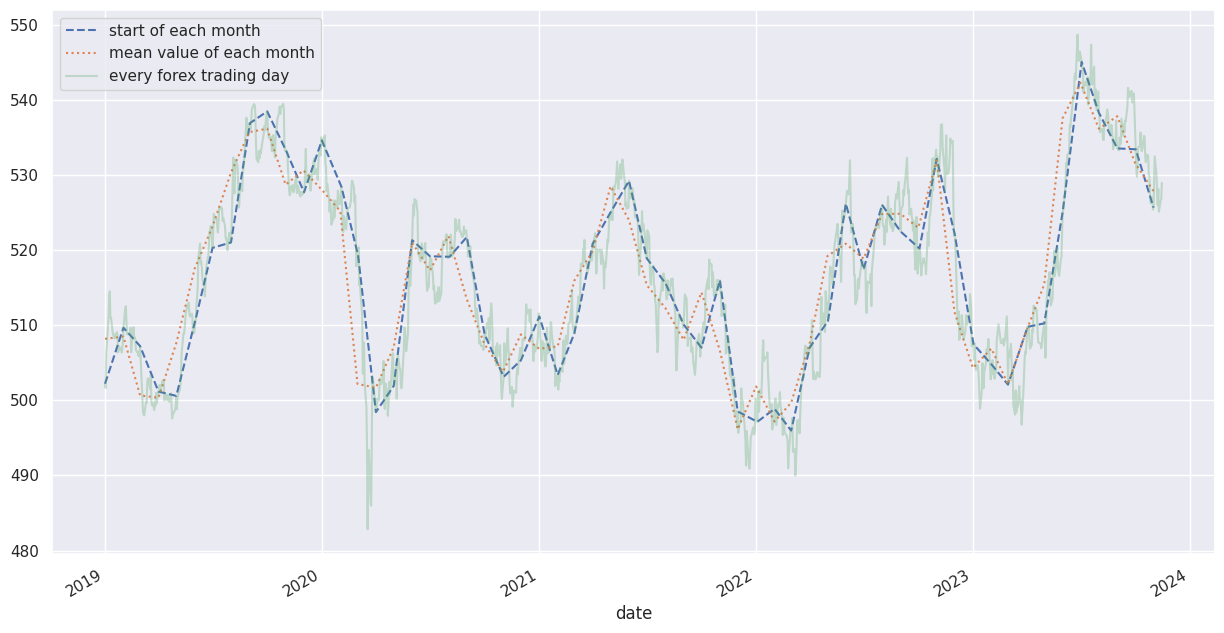

In [10]:
selling_rates.asfreq('BMS').plot(style='--', label='start of each month')
selling_rates.resample('MS').mean().plot(style=':', label='mean value of each month')
selling_rates.plot(alpha=0.3, style='-', label = 'every forex trading day')
plt.legend()

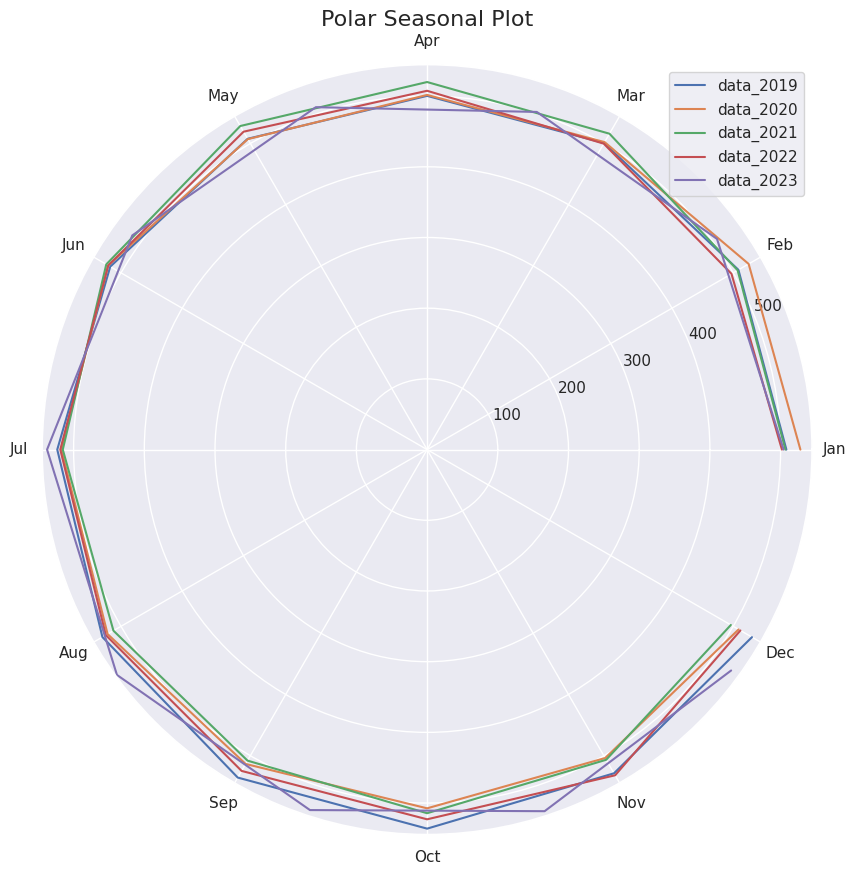

In [23]:
# Create an example time series data

data = selling_rates.resample('MS').mean()
# Convert dates to numerical format
data_2019 = data['2019-01-01':'2019-12-01']
data_2020 = data['2020-01-01':'2020-12-01']
data_2021 = data['2021-01-01':'2021-12-01']
data_2022 = data['2022-01-01':'2022-12-01']
data_2023 = data['2023-01-01':'2023-10-01']

# Plot the original time series
plt.figure(figsize=(10, 10))
ax = plt.subplot(111, projection='polar')

# Plot the seasonal component in polar coordinates
theta = np.linspace(0, 2 * np.pi, 12, endpoint=False)

ax.plot(theta, data_2019, label='data_2019')
ax.plot(theta, data_2020, label='data_2020')
ax.plot(theta, data_2021, label='data_2021')
ax.plot(theta, data_2022, label='data_2022')

theta_2023 = np.linspace(0, 2 * np.pi, len(data_2023), endpoint=False)
ax.plot(theta_2023, data_2023, label='data_2023')


# Set polar axis labels
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
month_angles = np.linspace(0, 2 * np.pi, 12, endpoint=False)
ax.set_xticks(month_angles)
ax.set_xticklabels(months)

# Add a title
plt.title('Polar Seasonal Plot', fontsize=16)

# Show the plot
plt.legend()
plt.show()

In [12]:
selling_rates.asfreq('BM')

date
2019-01-31    507.83
2019-02-28    505.85
2019-03-29    499.63
2019-04-30    499.40
2019-05-31    508.94
2019-06-28    523.20
2019-07-31    522.20
2019-08-30    536.67
2019-09-30    538.21
2019-10-31    533.21
2019-11-29    527.39
2019-12-31    535.01
2020-01-31    526.14
2020-02-28    517.85
2020-03-31    499.49
2020-04-30    506.20
2020-05-29    515.22
2020-06-30    517.63
2020-07-31    518.90
2020-08-31    522.63
2020-09-30    507.63
2020-10-30    500.19
2020-11-30    506.99
2020-12-31    511.57
2021-01-29    502.55
2021-02-26    510.01
2021-03-31    519.08
2021-04-30    524.07
2021-05-31    525.64
2021-06-30    519.06
2021-07-30    516.46
2021-08-31    509.68
2021-09-30    507.89
2021-10-29    514.81
2021-11-30    496.53
2021-12-31    500.25
2022-01-31    497.26
2022-02-28    496.00
2022-03-31    506.18
2022-04-29    513.72
2022-05-31    525.50
2022-06-30    518.51
2022-07-29    524.73
2022-08-31    525.19
2022-09-30    516.87
2022-10-31    533.38
2022-11-30    521.90
2022-12-

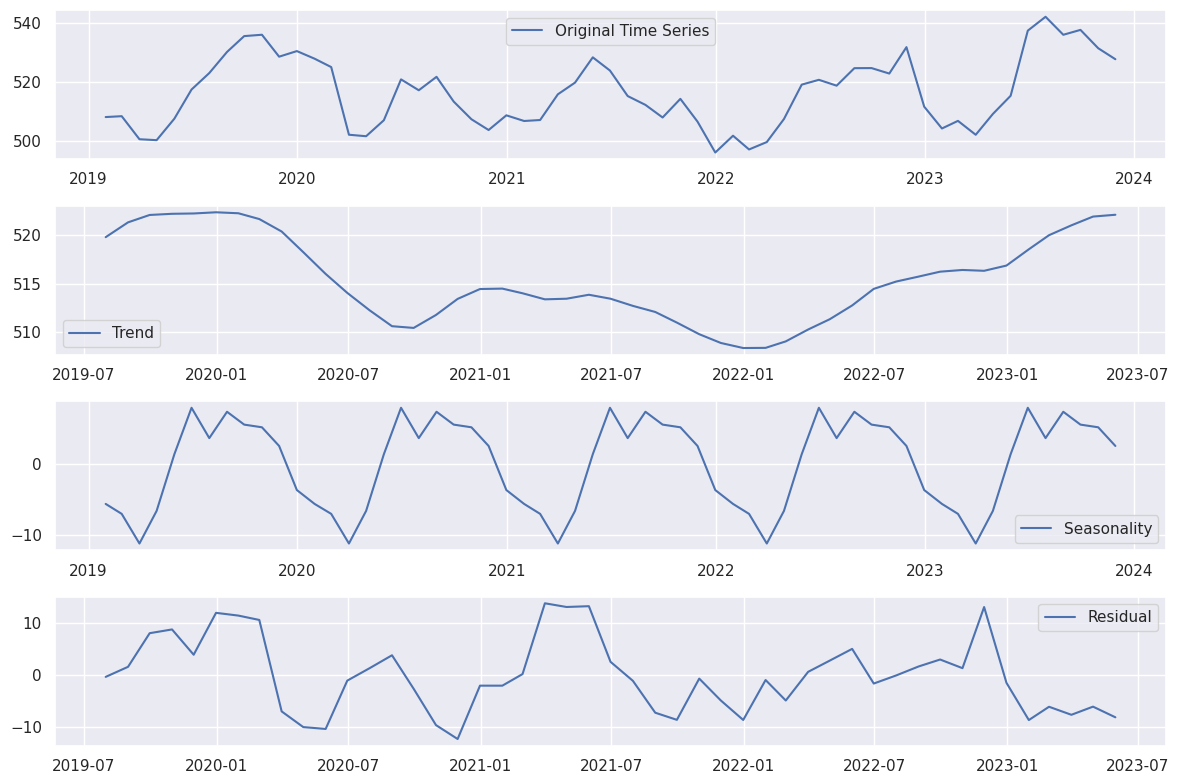

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# load time series data
# ts = selling_rates.asfreq('W', method='backfill')
ts = selling_rates.resample('M').mean()

# Perform seasonal decomposition
result = seasonal_decompose(ts)

# Access the decomposed components
trend = result.trend
seasonal = result.seasonal
residual = result.resid

# Plot the original time series and its components
plt.figure(figsize=(12, 8))

plt.subplot(4, 1, 1)
plt.plot(ts, label='Original Time Series')
plt.legend()

plt.subplot(4, 1, 2)
plt.plot(trend, label='Trend')
plt.legend()

plt.subplot(4, 1, 3)
plt.plot(seasonal, label='Seasonality')
plt.legend()

plt.subplot(4, 1, 4)
plt.plot(residual, label='Residual')
plt.legend()

plt.tight_layout()
plt.show()

In [21]:
result.trend['2019-07-01':'2019-08-01']

date
2019-07-31    519.787123
Freq: M, Name: trend, dtype: float64

In [22]:
ts['2019-07-01':'2019-08-01']

date
2019-07-31    523.146522
Freq: M, Name: bank_buying_exchange_rate, dtype: float64